# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

# 데이터 이해하기

### 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

## 칼럼 설명

- feature
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
 - Months_on_book : Period of relationship with bank
 - Total_Relationship_Count : Total no. of products held by the customer
 - Months_Inactive_12_mon : No. of months inactive in the last 12 months
 - Contacts_Count_12_mon : No. of Contacts in the last 12 months
 - Credit_Limit : Credit Limit on the Credit Card
 - Total_Revolving_Bal : Total Revolving Balance on the Credit Card
 - Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
 - Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
 - Total_Trans_Amt : Total Transaction Amount (Last 12 months)
 - Total_Trans_Ct : Total Transaction Count (Last 12 months)
 - Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
 - Avg_Utilization_Ratio : Average Card Utilization Ratio

- target
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1
1. 은행 카드 서비스 담당자의 입장

2. 카드 서비스를 이용하는 고객의 입장

위 두 가지를 생각하면서 데이터를 분석하는 것은 어떨까요??

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 평가방식

평가방식은 Logloss이기 때문에 predict_proba을 통해서 각 클래스의 예측 확률을 구하는 방식으로 에측을 해야합니다!

## 대회 주소
https://www.kaggle.com/t/cd058141be084c4f81c9df010c587ae4

In [2]:
# 데이터의 경로 각자에 맞추어서 변경해주세요
data_dir = '/home/mskang/hyeokjong/en/'

train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')
submission = pd.read_csv(data_dir + 'sample_submission.csv')

In [3]:
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1


# 데이터 전처리


In [4]:
display(train.columns)
display(train.info())
display(train.describe())

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_Am

None

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.291199,2.339958,35.905938,3.808172,2.347241,2.460931,8667.346587,1157.653746,7509.692840,0.760068,4444.729663,64.984199,0.711699,0.274665,0.160721
std,8.040300,1.300795,8.011260,1.553566,1.013624,1.098309,9127.897938,815.062550,9129.855775,0.218224,3448.702344,23.608677,0.235800,0.277166,0.367296
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,563.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2557.000000,289.000000,1316.000000,0.631000,2169.000000,45.000000,0.583000,0.020000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1273.000000,3508.000000,0.737000,3904.000000,67.000000,0.700000,0.173000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11135.000000,1781.000000,9930.000000,0.859000,4754.000000,81.000000,0.818000,0.504000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,138.000000,3.714000,0.999000,1.000000


데이터에 결측치는 존재하지 않는 것으로 보입니다.

하지만 진짜 결측치가 존재하지 않을까요?

결측치가 다른 이름으로 기록되어 있을 수도 있고 0으로 기록되어 있을 수도 있습니다.

이 부분은 한번 EDA를 통해서 확인해보세요!

# EDA

정형데이터의 경우 feature engineering 이 모델의 성능에 정말 큰 영향을 주기 때문에 EDA를 통해서 얻은 인사이트를 바탕으로 최고의 feature를 만들어보세요! 

### categorical은 Attrition_Flag Gender Education_Level Marital_Status  Income_Category  Card_Category 

In [5]:
cate = ["Attrition_Flag", "Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

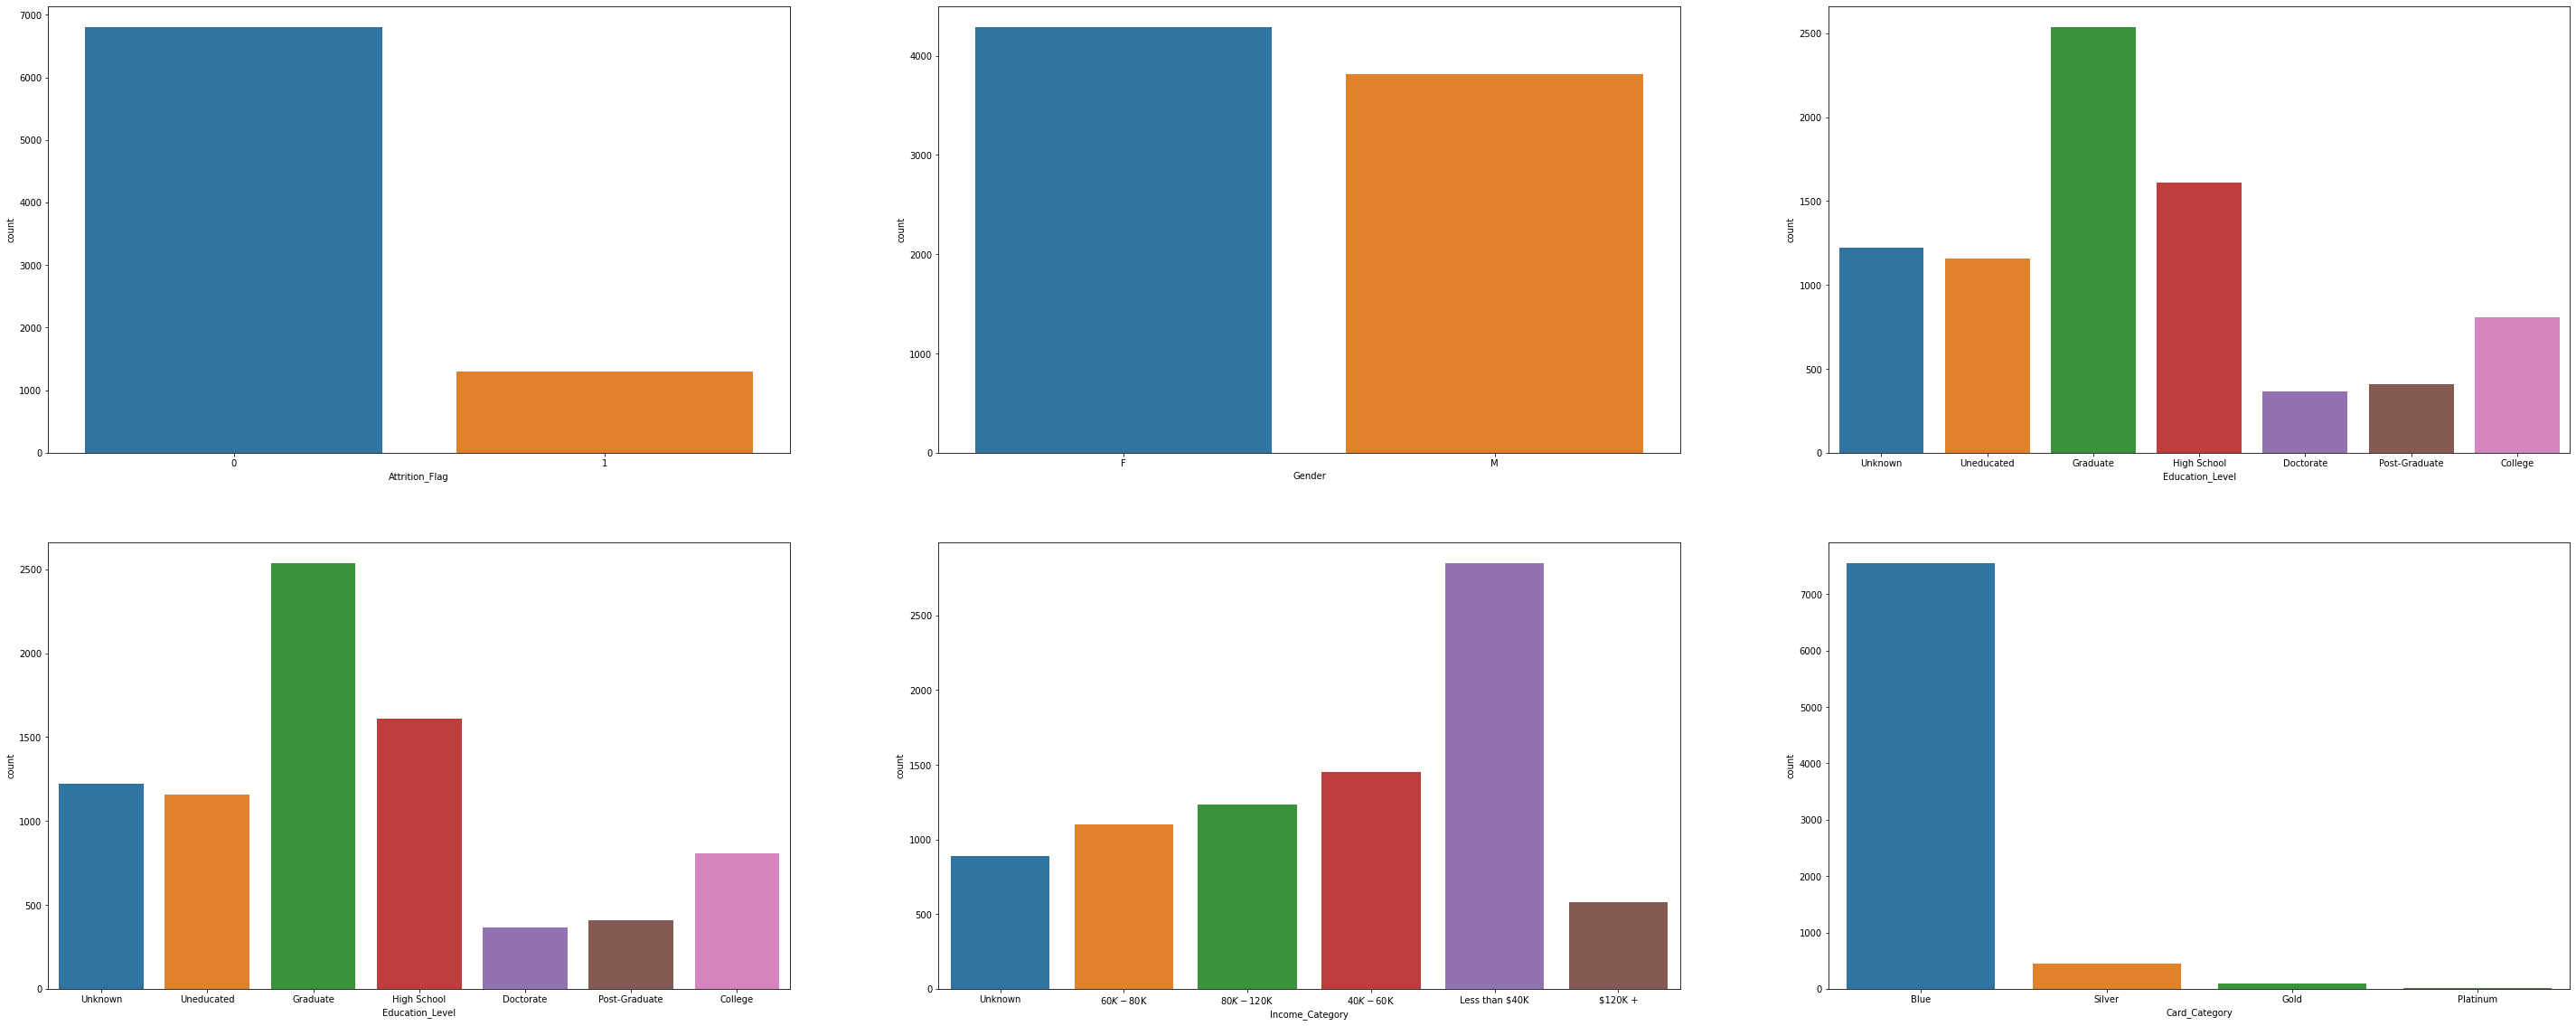

In [6]:
fig = plt.figure(figsize = (50,20))


a1 = fig.add_subplot(2,3,1)
a2 = fig.add_subplot(2,3,2)
a3 = fig.add_subplot(2,3,3)
a4 = fig.add_subplot(2,3,4)
a5 = fig.add_subplot(2,3,5)
a6 = fig.add_subplot(2,3,6)


sns.countplot(train[cate[0]], ax = a1)
sns.countplot(train[cate[1]], ax = a2)
sns.countplot(train[cate[2]], ax = a3)
sns.countplot(train[cate[2]], ax = a4)
sns.countplot(train[cate[4]], ax = a5)
sns.countplot(train[cate[5]], ax = a6)

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

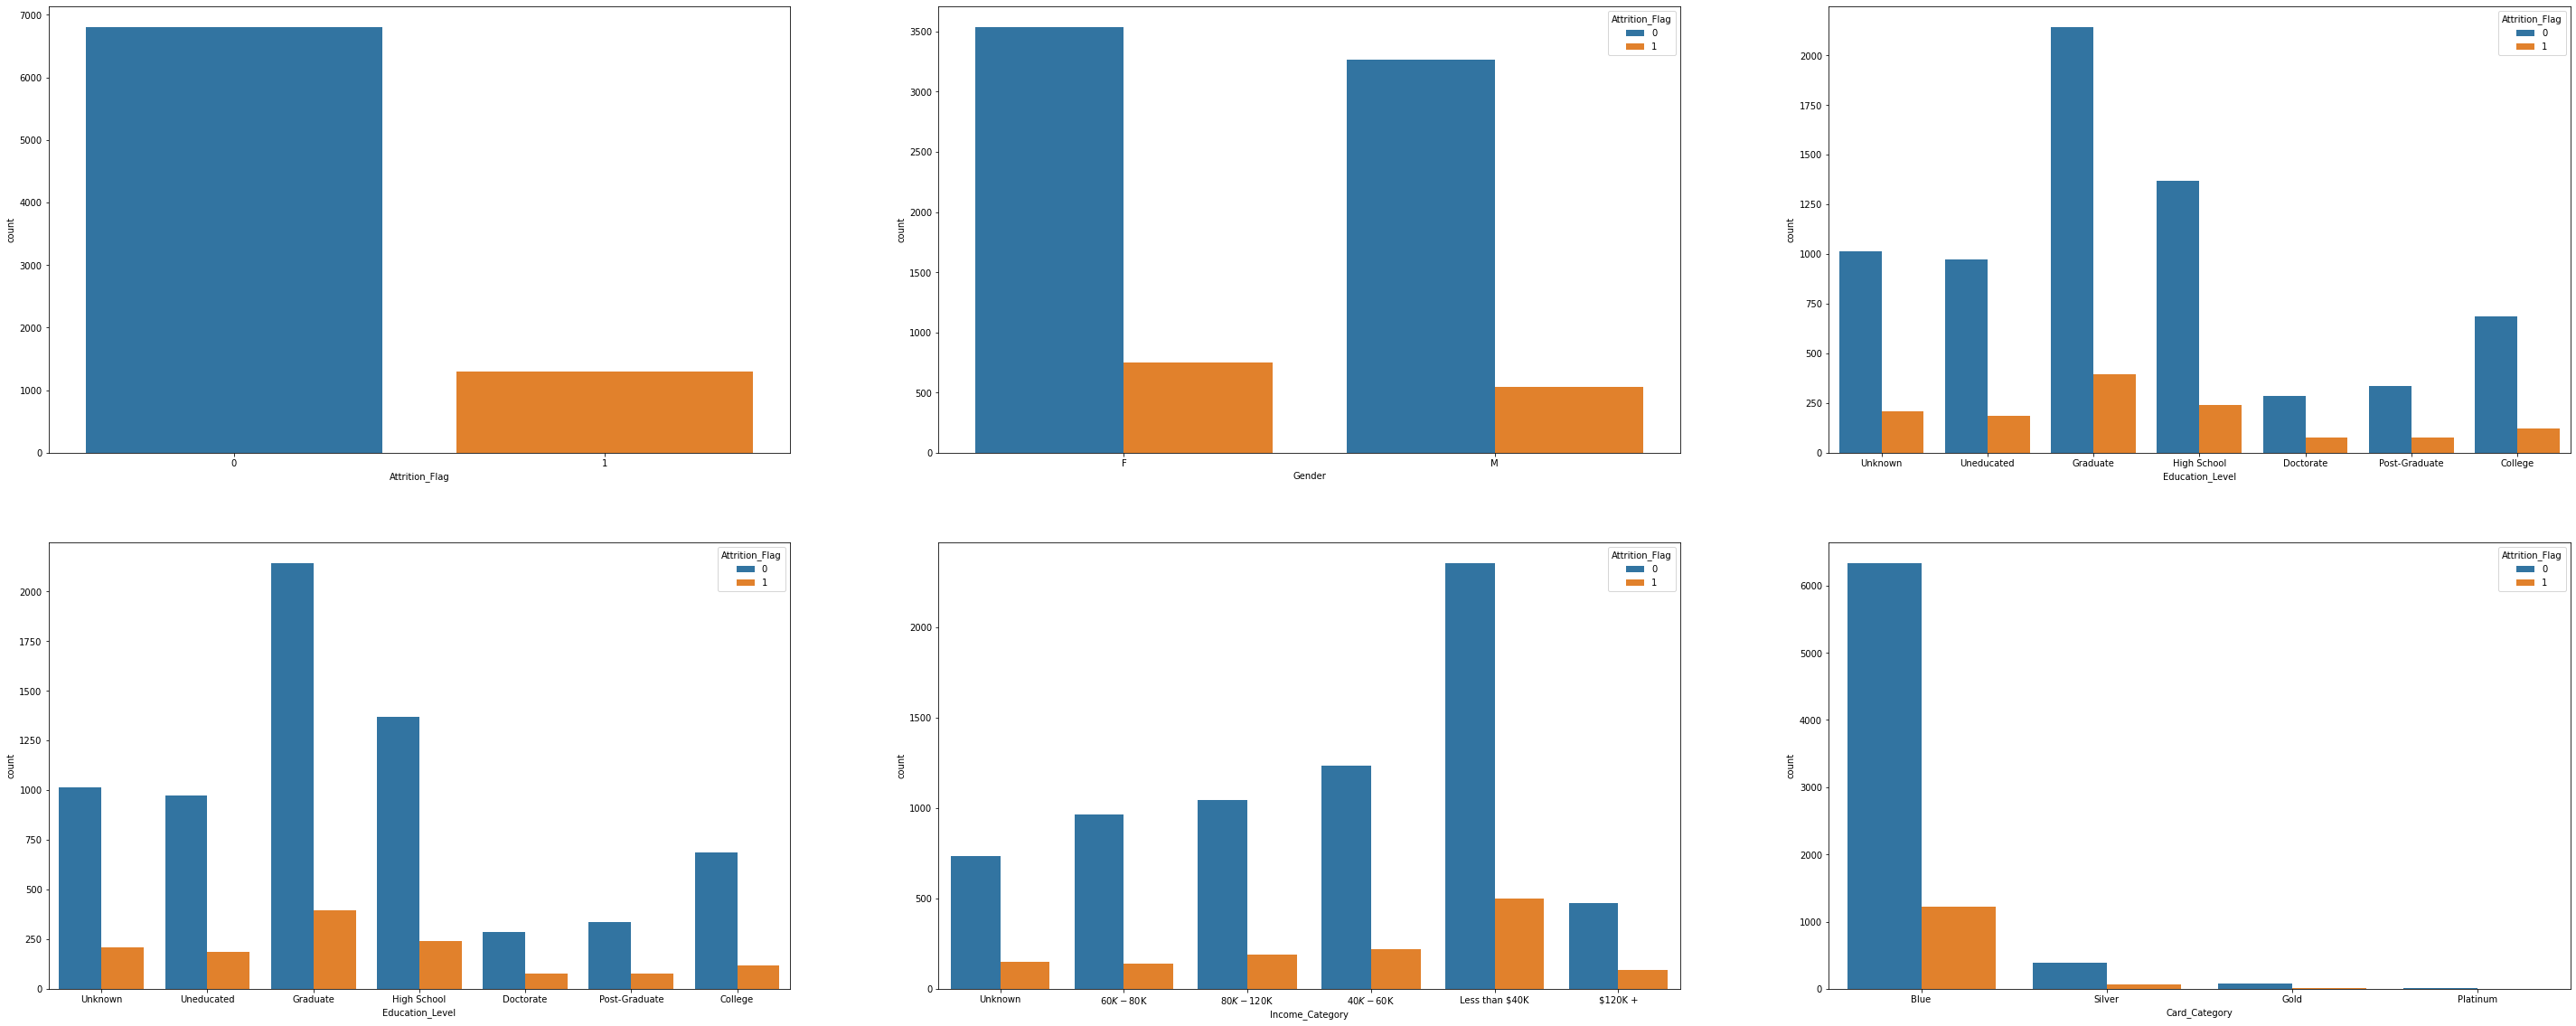

In [7]:
fig = plt.figure(figsize = (50,20))


a1 = fig.add_subplot(2,3,1)
a2 = fig.add_subplot(2,3,2)
a3 = fig.add_subplot(2,3,3)
a4 = fig.add_subplot(2,3,4)
a5 = fig.add_subplot(2,3,5)
a6 = fig.add_subplot(2,3,6)


sns.countplot(train[cate[0]], ax = a1)
sns.countplot(train[cate[1]], ax = a2, hue = train[cate[0]])
sns.countplot(train[cate[2]], ax = a3, hue = train[cate[0]])
sns.countplot(train[cate[2]], ax = a4, hue = train[cate[0]])
sns.countplot(train[cate[4]], ax = a5, hue = train[cate[0]])
sns.countplot(train[cate[5]], ax = a6, hue = train[cate[0]])

In [8]:
nu = ["Attrition_Flag","Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon",
       "Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]


In [9]:
num = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']
#6

In [10]:
from scipy.stats import norm
def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//3 , 3,figsize=(20, 12))
    
    index = 0
    for i in range(len(columns)//3 ):
        for j in range(3):
            sns.distplot(train.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1

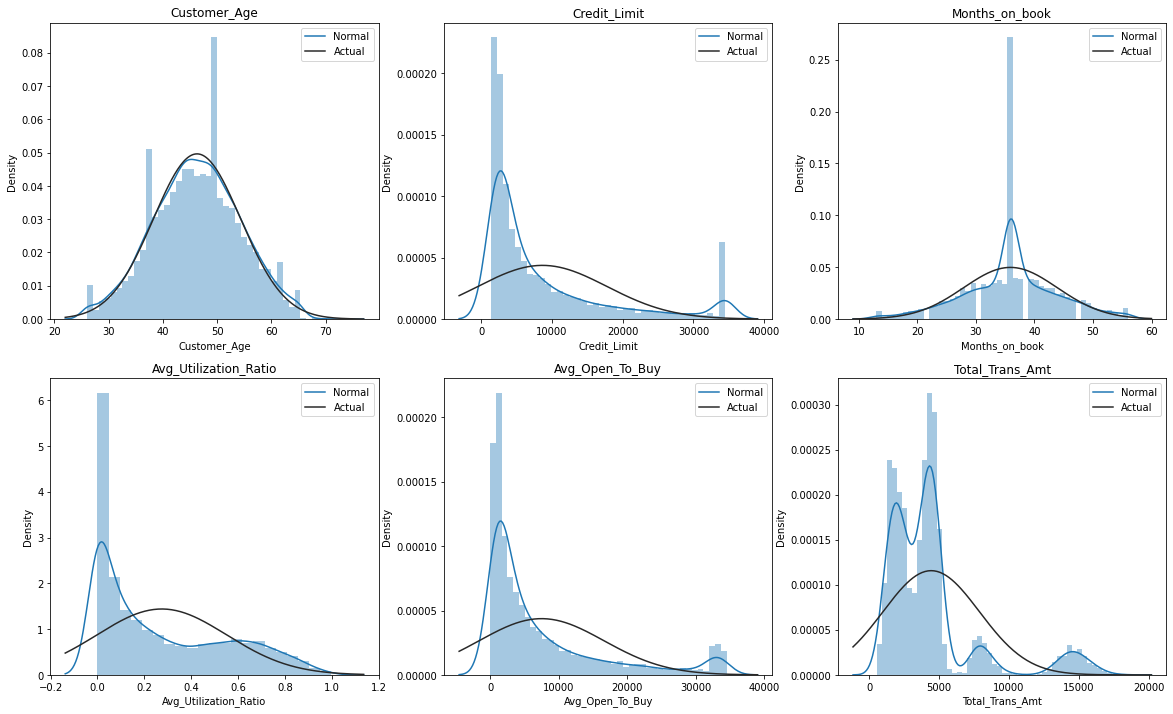

In [11]:
plotDistPlot(num)

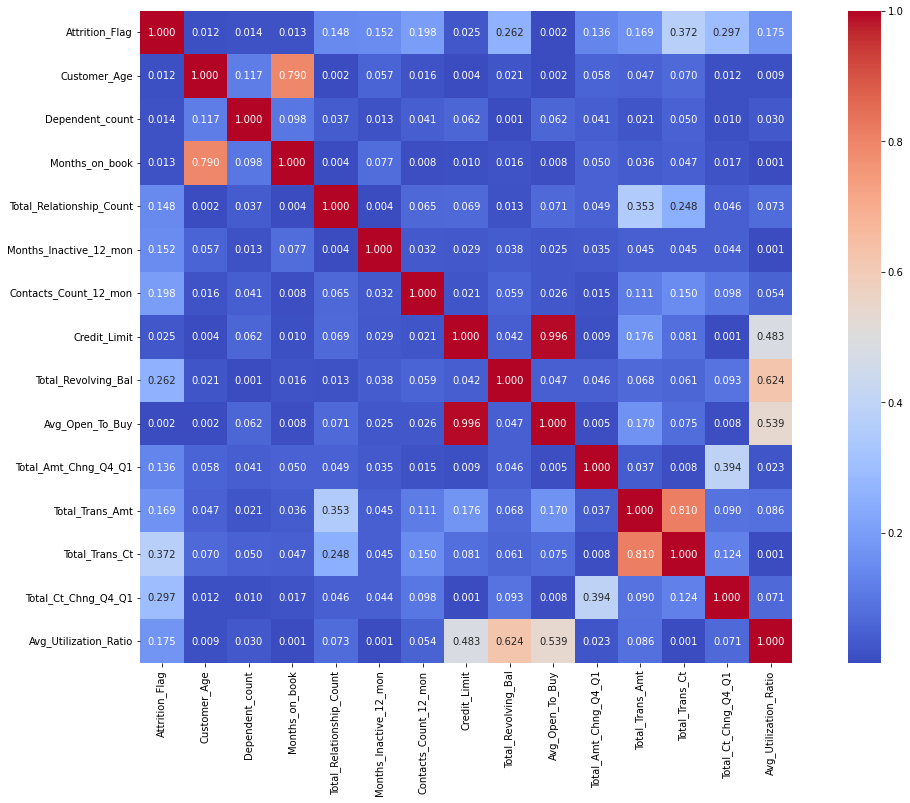

In [12]:
corr_data = train.loc[:, nu].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

numeric중에는 corr이 큰건 없어 보입니다.

# Cate -> num

In [13]:
new = pd.DataFrame()

new['Gender'] = train.Gender.map({'M':1, 'F':0})
new['Income_Category'] = train.Income_Category.map({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})
new['Education_Level'] = train.Education_Level.map({'Unknown': 0, 'High School':1, 'Graduate':2, 'Uneducated':3, 'College':4,'Post-Graduate':5,'Doctorate':6})
new.head(3)

,Gender,Income_Category,Education_Level
0,0,0,0
1,1,4,3
2,1,3,3


In [14]:
card_dummies = pd.get_dummies(train['Card_Category'], prefix='Card')
marital_dummies = pd.get_dummies(train['Marital_Status'], prefix='Marital')
cat = pd.concat([new, marital_dummies, card_dummies], axis=1)


In [15]:
new_train = pd.concat([cat, train.loc[:, nu]], axis=1)

In [16]:
new_train.Attrition_Flag

0       0
1       0
2       0
3       0
4       0
       ..
8096    0
8097    0
8098    0
8099    0
8100    0
Name: Attrition_Flag, Length: 8101, dtype: int64

In [17]:
new_train.head(3)

,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,0,0,1,0,0,0,1,0,0,...,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075
1,1,4,3,0,0,1,0,1,0,0,...,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156
2,1,3,3,1,0,0,0,1,0,0,...,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655


In [18]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    8101 non-null   int64  
 1   Income_Category           8101 non-null   int64  
 2   Education_Level           8101 non-null   int64  
 3   Marital_Divorced          8101 non-null   uint8  
 4   Marital_Married           8101 non-null   uint8  
 5   Marital_Single            8101 non-null   uint8  
 6   Marital_Unknown           8101 non-null   uint8  
 7   Card_Blue                 8101 non-null   uint8  
 8   Card_Gold                 8101 non-null   uint8  
 9   Card_Platinum             8101 non-null   uint8  
 10  Card_Silver               8101 non-null   uint8  
 11  Attrition_Flag            8101 non-null   int64  
 12  Customer_Age              8101 non-null   int64  
 13  Dependent_count           8101 non-null   int64  
 14  Months_o

# 모두 numeric으로 encoding!

# Model

저는 라벨인코딩만을 이용한 간단한 베이스 라인 모델을 만들었습니다.

16기 분들은 feature engineering, 하이퍼 파라미터 튜닝, 앙상블 등 다양한 방법으로 성능이 우수한 모델을 만들어보세요!

In [19]:
# Importing packages for modelling.
#!pip install xgboost
#!pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [20]:
from tqdm import tqdm

def estimates(X_data, y_data, models, cv):
    
    train_acc_dict = dict()
    test_acc_dict = dict()
    time_dict = dict()
    
    for model in tqdm(models):
        current_model_name = model.__class__.__name__
        cv_results = cross_validate(model, X_data, y_data, cv=cv, return_train_score=True, scoring='accuracy')  # 교차검증
        train_acc_dict[current_model_name] = cv_results['train_score'].mean()
        test_acc_dict[current_model_name] = cv_results['test_score'].mean()
        time_dict[current_model_name] = cv_results['fit_time'].mean()
        
    return train_acc_dict, test_acc_dict, time_dict

In [21]:
m_logreg = LogisticRegression()
m_gbc = GradientBoostingClassifier()
m_rfc = RandomForestClassifier(criterion='gini')
m_lgb = lgb.LGBMClassifier()
m_xgb = xgb.XGBClassifier()
m_svc = SVC(probability=True)

In [22]:
cv = StratifiedKFold(11, shuffle=True, random_state=14)

models = [m_logreg, m_gbc, m_rfc, m_lgb, m_xgb, m_svc]

X = new_train.drop('Attrition_Flag', axis=1)
y = new_train['Attrition_Flag']

print(X.shape)
print(y.shape)

train_acc_dict, test_acc_dict, time_dict = estimates(X, y, models, cv)

(8101, 25)
(8101,)


 67%|████████████████████████████████████████████████████████▋                            | 4/6 [00:32<00:15,  7.86s/it]

[23:40:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:22<00:00, 23.83s/it]


In [23]:
# Training acc
for key, value in train_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 88.0%
GradientBoostingClassifier - 97.5%
RandomForestClassifier - 100.0%
LGBMClassifier - 100.0%
XGBClassifier - 100.0%
SVC - 83.9%


In [24]:
# Test acc
for key, value in test_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 87.9%
GradientBoostingClassifier - 96.5%
RandomForestClassifier - 95.9%
LGBMClassifier - 97.2%
XGBClassifier - 97.0%
SVC - 83.9%


In [25]:
def result_barplots(result_1, result_2, ylabel_1 = 'Score', ylabel_2 = 'Score'):
    
    current_df_1 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_1:list(result_1.values())})
    current_df_2 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_2:list(result_1.values())})
    
    current_df_1 = current_df_1.sort_values(by=ylabel_1, ascending=False)
    current_df_2 = current_df_2.sort_values(by=ylabel_2, ascending=False)
    
    fig, ax = plt.subplots(1,2,figsize=(18,9), constrained_layout=True)
    
    for i in range(2):
        for item in ax[i].get_xticklabels():
            item.set_rotation(45)
    
    sns.barplot('Model',ylabel_1,data=current_df_1,ax=ax[0])
    sns.barplot('Model',ylabel_2,data=current_df_2,ax=ax[1])

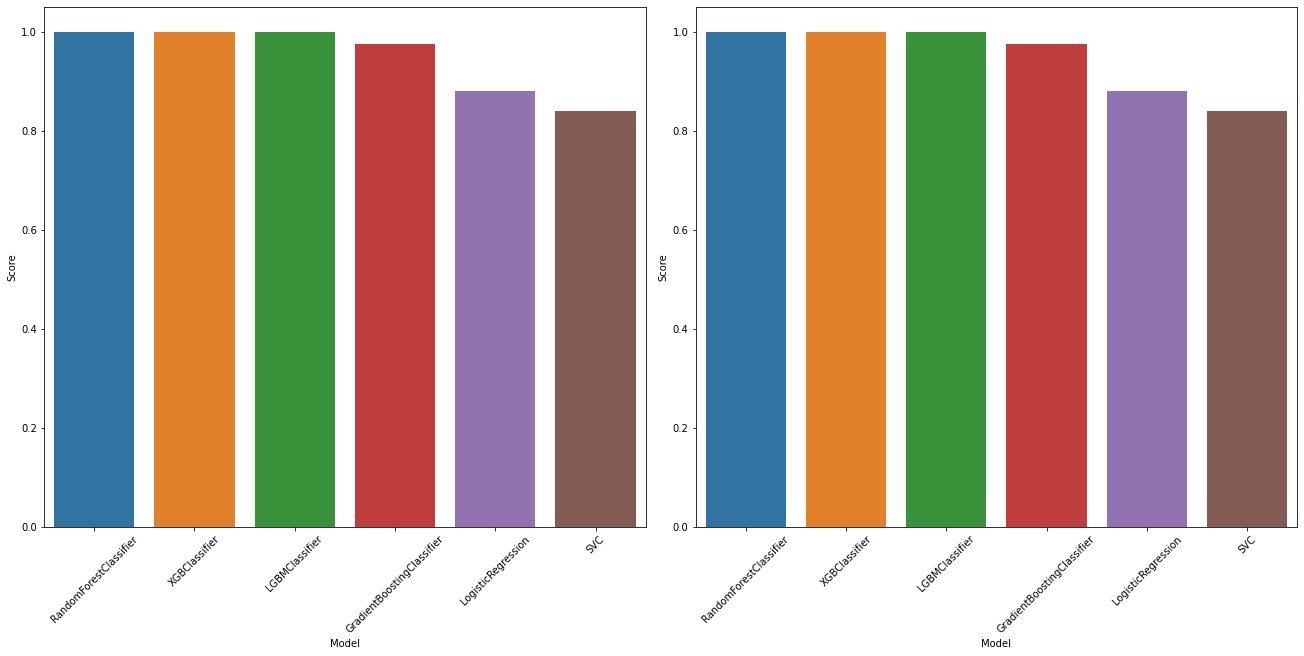

In [26]:
result_barplots(train_acc_dict, test_acc_dict)

In [27]:
# 가장 성능이 좋았던 모델
model = xgb.XGBClassifier()

In [28]:
model.fit(X,y)

[23:42:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=40,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
model.predict_proba(X)

array([[9.9697405e-01, 3.0259371e-03],
       [9.9996048e-01, 3.9542767e-05],
       [9.9978387e-01, 2.1615376e-04],
       ...,
       [9.9989605e-01, 1.0396380e-04],
       [9.9995750e-01, 4.2502888e-05],
       [9.9997753e-01, 2.2493108e-05]], dtype=float32)

# 예측

저는 Stacking 사용했지만 16기 분들은 다양한 방식을 활용해서 모델의 성능을 높여주세요!  

같은 방법으로 전처리

In [32]:
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,F,2,College,Single,Less than $40K,Blue,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,M,1,College,Married,$80K - $120K,Blue,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,M,0,Unknown,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,M,3,Unknown,Single,$60K - $80K,Blue,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,F,2,High School,Married,$40K - $60K,Blue,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


In [33]:
new_test = pd.DataFrame()

new_test['Gender'] = test.Gender.map({'M':1, 'F':0})
new_test['Income_Category'] = test.Income_Category.map({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})
new_test['Education_Level'] = test.Education_Level.map({'Unknown': 0, 'High School':1, 'Graduate':2, 'Uneducated':3, 'College':4,'Post-Graduate':5,'Doctorate':6})
new_test.head(3)

,Gender,Income_Category,Education_Level
0,0,1,4
1,1,3,4
2,1,2,0


In [34]:
card_dummies = pd.get_dummies(test['Card_Category'], prefix='Card')
marital_dummies = pd.get_dummies(test['Marital_Status'], prefix='Marital')
cat_test = pd.concat([new_test, marital_dummies, card_dummies], axis=1)


In [35]:
nu = ["Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon",
       "Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]

new_test = pd.concat([cat_test, test.loc[:, nu]], axis=1)

In [36]:
new_test

,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,1,4,0,0,1,0,1,0,0,...,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,1,3,4,0,1,0,0,1,0,0,...,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,1,2,0,0,1,0,0,1,0,0,...,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,1,4,0,0,0,1,0,1,0,0,...,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,0,2,1,0,1,0,0,1,0,0,...,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,0,2,5,0,0,1,0,1,0,0,...,3,4,5182.0,1607,3575.0,0.874,5235,92,0.586,0.310
2022,0,1,4,0,0,1,0,1,0,0,...,1,4,9297.0,1668,7629.0,0.521,1264,31,0.632,0.179
2023,1,3,1,0,0,0,1,1,0,0,...,1,0,2126.0,1321,805.0,0.596,2992,72,1.000,0.621
2024,0,1,3,0,0,0,1,1,0,0,...,2,1,3150.0,2222,928.0,0.794,14750,96,0.655,0.705


In [37]:
X

,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,0,0,1,0,0,0,1,0,0,...,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075
1,1,4,3,0,0,1,0,1,0,0,...,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156
2,1,3,3,1,0,0,0,1,0,0,...,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655
3,0,2,2,0,0,1,0,1,0,0,...,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468
4,0,1,3,0,1,0,0,1,0,0,...,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,0,1,2,1,0,0,0,1,0,0,...,2,2,2391.0,1625,766.0,0.662,7649,101,0.603,0.680
8097,1,2,3,0,1,0,0,1,0,0,...,0,3,1438.3,0,1438.3,1.023,5046,77,0.925,0.000
8098,0,1,2,0,1,0,0,1,0,0,...,2,3,1438.3,0,1438.3,0.851,4765,71,1.088,0.000
8099,0,1,1,0,1,0,0,1,0,0,...,2,0,3187.0,2517,670.0,1.144,1627,38,0.652,0.790


In [38]:
y_pred = model.predict_proba(new_test)

In [39]:
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1


In [40]:
y_pred

array([[9.9970853e-01, 2.9143813e-04],
       [9.9973875e-01, 2.6124611e-04],
       [9.8632658e-01, 1.3673398e-02],
       ...,
       [9.9998444e-01, 1.5580212e-05],
       [9.9990213e-01, 9.7882898e-05],
       [9.9957377e-01, 4.2623325e-04]], dtype=float32)

In [41]:
submission.iloc[:, 1:] = y_pred
submission.to_csv(data_dir + 'your_model.csv', index = False)
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0.999709,0.000291
1,1,0.999739,0.000261
2,2,0.986327,0.013673
3,3,0.998360,0.001640
4,4,0.999977,0.000023
